# Influence Early Access vs Populate the Belt asteroid visualizations

This notebooks compared the asteroids bought in the early access (EA) sale versus the one bought in the
populate the belt (PTB) sale.

Data courtesy of adalia.info. [EA json direct download link.](https://drive.google.com/file/d/1EhYDDp09UVM4WhpfcPpyXBTe8eU3syho/view)
The PTB json was directly exported from [adalia.info](adalia.info) (date 19-9-2021, 21:20 CET).
Deposit files in the root directory.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

ea_df = pd.read_json('2021-09-05-adalia-info-asteroids.json', lines=True)
ptb_df = pd.read_json('adalia-info-asteroids-full.json', lines=True)

In [25]:
ea_df = ea_df[ea_df['owner'].notnull()]
owned_df = ptb_df[ptb_df['owner'].notnull()]
ptb_df = owned_df[~owned_df['id'].isin(ea_df['id'])]
print(ea_df.shape, owned_df.shape, ptb_df.shape)

(1860, 17) (11111, 17) (9251, 17)


<AxesSubplot:title={'center':'Owned asteroids spectral type distribution'}>

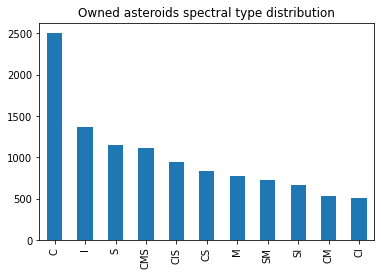

In [26]:
owned_df['spectralType'].value_counts().plot(kind='bar', title="Owned asteroids spectral type distribution")

<AxesSubplot:title={'center':'EA asteroids spectral type distribution'}>

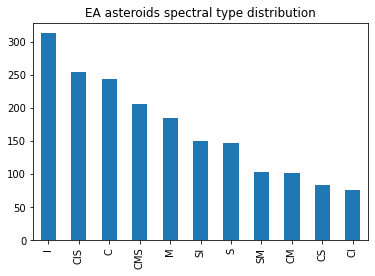

In [27]:
ea_df['spectralType'].value_counts().plot(kind='bar', title="EA asteroids spectral type distribution")

<AxesSubplot:title={'center':'PTB asteroids spectral type distribution'}>

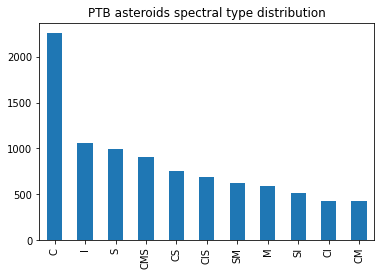

In [28]:
ptb_df['spectralType'].value_counts().plot(kind='bar', title="PTB asteroids spectral type distribution")

In these charts we look at the purchased spectral types. In EA I types were very popular, in PTB still so, but it got
overtaken by an absolutely massive amount of C types being bought! Maybe people started expecting C types to be much
needed, or maybe it's pure coincidence as they are the most frequent type in the Adalia system, who knows... As always,
dual types are unpopular though.

Text(0.5, 1.0, 'EA asteroid sizes')

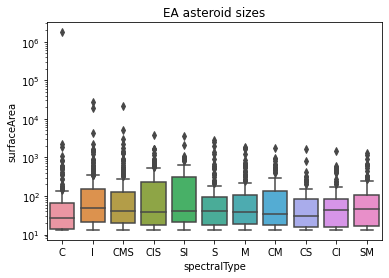

In [29]:
# Illustrate size distribution
ax = sns.boxplot(x="spectralType", y="surfaceArea", data=ea_df)
ax.set_yscale("log")
plt.title('EA asteroid sizes')

Text(0.5, 1.0, 'PTB asteroid sizes')

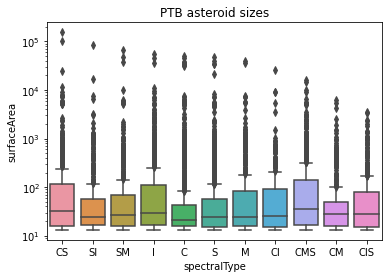

In [30]:
# Illustrate size distribution
ax = sns.boxplot(x="spectralType", y="surfaceArea", data=ptb_df)
ax.set_yscale("log")
plt.title('PTB asteroid sizes')

Now this sheds some light on the previous story. If you look at the boxplot for C types you can see that PTB owners
mostly went for the minimum size asteroids. During the sale you could get a crew member citizen for free per purchased
asteroid, so this suggests that people buying this C types were eyeing to get a lot of crew.

On the medium asteroid size, most have went for CMS, CS and I types.

<AxesSubplot:title={'center':'EA asteroid owner count'}>

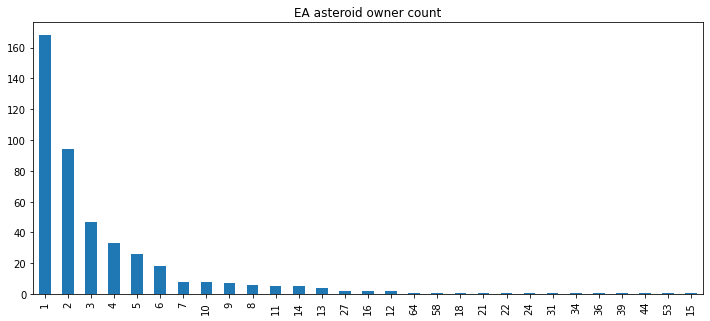

In [31]:
ea_whale_addresses = ea_df['owner'].value_counts()
ea_asteroid_count = ea_whale_addresses.value_counts()
ea_asteroid_count.plot(kind='bar', title="EA asteroid owner count", figsize=(12,5))

In [32]:
top_5_ea_whales = zip(list(ea_whale_addresses), list(ea_whale_addresses.index))
top_5_ea_whales = sorted(top_5_ea_whales, reverse=True)[:10]
print(f"Top 10 EA asteroid owners: ")
for whale in top_5_ea_whales:
    print(whale)


Top 10 EA asteroid owners: 
(64, '0x1AFf1E0f1D5F76f92145a278D8C31AF9aDe783dd')
(58, '0x9a861Cf02A28482c6E8FB1Ec1959004c553D7daE')
(53, '0xEF1bd3fc679A6F0CD296b59Aff99DDc21409869F')
(44, '0x6f0613F576CBC92b88BF7E7fbA7fA2EB72fDa557')
(39, '0x66ab6A57322aC5FD7026662675Db0E83307e025E')
(36, '0xBAD1085c42cFC7c1c8729cbD485FCe8b253B5C14')
(34, '0x5757fe6999228E1c60461d7C128f700571B960dB')
(31, '0x70448fa6Dd61fb3f94B806d5dEF4E5E8DBeF7ADA')
(27, '0xD71a41eC000089ae99873AFB4D15CC7d54Dd95Bc')
(27, '0x49519441B722bD1D31c074852F215e6FE19f38d9')


<AxesSubplot:title={'center':'PTB asteroid owner count'}>

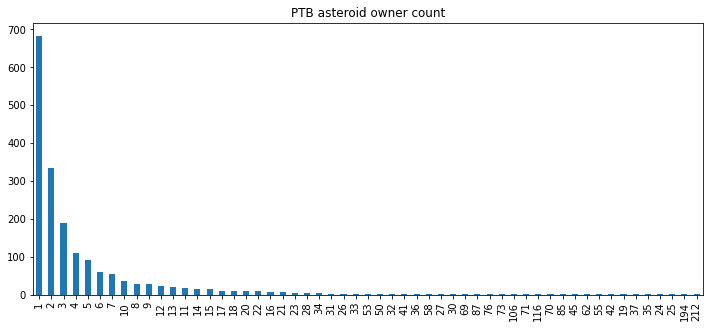

In [33]:
ptb_whale_addresses = ptb_df['owner'].value_counts()
ptb_asteroid_count = ptb_whale_addresses.value_counts()
ptb_asteroid_count.plot(kind='bar', title="PTB asteroid owner count", figsize=(12,5))

In [34]:
top_5_ptb_whales = zip(list(ptb_whale_addresses), list(ptb_whale_addresses.index))
top_5_ptb_whales = sorted(top_5_ptb_whales, reverse=True)[:10]
print(f"Top 10 PTB asteroid owners: ")
for whale in top_5_ptb_whales:
    print(whale)

Top 10 PTB asteroid owners: 
(212, '0x7147b54fd35355e5f6b95dd44c21d135e8b95d14')
(194, '0xc1563bdf57bdb990c89070aa72cda57fe8d6913d')
(116, '0xe72eb31b59f85b19499a0f3b3260011894fa0d65')
(106, '0x024b66e23a1f2ef639b957a619db51ff0a269815')
(87, '0x283140a0fc33855e4374f09977bff20ac5057b68')
(85, '0xe5dcbc6a0b151ab2c35b8451975def0c387023d5')
(76, '0xf748879edbe8cca140940788163d7be4d2a2e46a')
(73, '0xd15e7ab216addb92bd95d96cb5d0f3f43719c679')
(71, '0xd5a9c4a92dde274e126f82b215fccb511147cd8e')
(70, '0xe5a82f9360b9d105f82d264b35b09c7442c93bbf')


Most of the owners have gone for 1-2 asteroids. Nothing surprising, as this one is all you need to have acces to
landlord mode. I expected the people from the PTB sale to go more for a selection of 5 asteroids however, as this is
allowed you to get a set of 5 crew member citizens, but it seems that was not the case.

As far as the whales go, it seems that none of the EA whales have turned up in the PTB whale top 10. Whichever way you
look at it, it's a lot though. Even assumming the top PTB whale bought only the cheapest asteroids, that would still
cost them close to $16k.


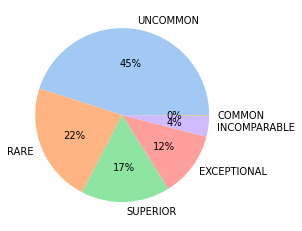

In [49]:
ea_rarities = ea_df['rarity'].value_counts()
colors = sns.color_palette('pastel')[0:6]
plt.pie([r / sum(ea_rarities) for r in ea_rarities], labels=list(ea_rarities.index), autopct='%.0f%%', colors=colors);

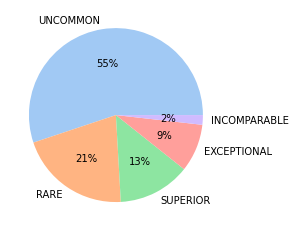

In [50]:
ptb_rarities = ptb_df['rarity'].value_counts()
colors = sns.color_palette('pastel')[0:5]
plt.pie([r / sum(ptb_rarities) for r in ptb_rarities], labels=list(ptb_rarities.index), autopct='%.0f%%', colors=colors);

As was made clear publicly, the EA asteroids got a bigger scan bonus than the PTB ones, which shows up in the rarity
distribution.

Anyway the lesson here is to not feel too bad if you roll uncommon, as the chance is really high for that to happen in
both cases.
